In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans

In [2]:
# ==========================
# 1. Load Only One Chunk
# ==========================
chunksize = 100_000  # number of rows per chunk
chunks = pd.read_csv(r"C:\Users\ACER\Downloads\archive (11)\US_Accidents_March23.csv", chunksize=chunksize)

df = next(chunks)  # Only first chunk
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (100000, 46)
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  Fals

In [3]:
# ==========================
# 2. Preprocessing
# ==========================
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df.describe()


,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000,100000,100000.000000,100000.000000,0.0,0.0,100000.000000,98409.000000,4322.000000,98144.000000,98708.000000,98154.000000,76180.000000,7368.000000
mean,2.448120,2016-09-13 05:06:10.255489792,2016-09-13 05:48:42.602379776,35.630369,-119.322756,NaN,NaN,0.011345,66.641262,48.845812,59.794170,29.961021,9.338639,8.044165,0.025786
min,1.000000,2016-02-08 05:46:00,2016-02-08 06:37:59,32.542587,-123.813927,NaN,NaN,0.000000,3.200000,-8.400000,4.000000,2.980000,0.100000,0.000000,0.000000
25%,2.000000,2016-07-19 10:51:31.249999872,2016-07-19 11:32:45,33.957775,-121.828468,NaN,NaN,0.000000,57.900000,37.100000,43.000000,29.890000,10.000000,4.600000,0.000000
50%,2.000000,2016-09-18 18:18:02,2016-09-18 18:58:13.500000,34.168579,-118.384232,NaN,NaN,0.000000,66.000000,42.500000,62.000000,29.970000,10.000000,6.900000,0.000000
75%,3.000000,2016-11-20 01:16:09.249999872,2016-11-20 01:47:11.750000128,37.776682,-117.916023,NaN,NaN,0.010000,75.000000,63.000000,78.000000,30.060000,10.000000,10.400000,0.030000
max,4.000000,2017-01-26 20:07:03,2017-01-26 20:52:00,41.428753,-81.550728,NaN,NaN,51.130000,114.100000,107.000000,100.000000,33.040000,80.000000,241.700000,0.550000
std,0.499931,NaN,NaN,2.101259,3.663525,NaN,NaN,0.262244,12.703846,19.898270,23.184442,0.275672,1.885828,4.298926,0.051695


In [4]:
df.duplicated().sum()


np.int64(0)

In [5]:
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  100000
End_Lng                  100000
Distance(mi)                  0
Description                   0
Street                        0
City                          1
County                        0
State                         0
Zipcode                       7
Country                       0
Timezone                      7
Airport_Code                  7
Weather_Timestamp          1054
Temperature(F)             1591
Wind_Chill(F)             95678
Humidity(%)                1856
Pressure(in)               1292
Visibility(mi)             1846
Wind_Direction             1064
Wind_Speed(mph)           23820
Precipitation(in)         92632
Weather_Condition          1604
Amenity                       0
Bump                          0
Crossing

In [6]:
df.info

<bound method DataFrame.info of              ID   Source  Severity          Start_Time            End_Time  \
0           A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1           A-2  Source2         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2           A-3  Source2         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
3           A-4  Source2         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
4           A-5  Source2         2 2016-02-08 07:39:07 2016-02-08 08:09:07   
...         ...      ...       ...                 ...                 ...   
99995  A-100002  Source2         3 2016-04-05 15:52:14 2016-04-05 16:52:14   
99996  A-100003  Source2         3 2016-04-05 15:57:10 2016-04-05 16:57:10   
99997  A-100004  Source2         2 2016-04-05 16:02:16 2016-04-05 17:02:16   
99998  A-100005  Source3         2 2016-04-05 16:01:17 2016-04-05 17:01:17   
99999  A-100006  Source2         2 2016-04-05 16:06:41 2016-04-05 17:06:41   

       Start_Lat   Start_Lng  E

In [7]:
# ==========================
# 3. Feature Engineering
# ==========================
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)


C:\Users\ACER\AppData\Local\Temp\ipykernel_8328\2224856978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='coolwarm')


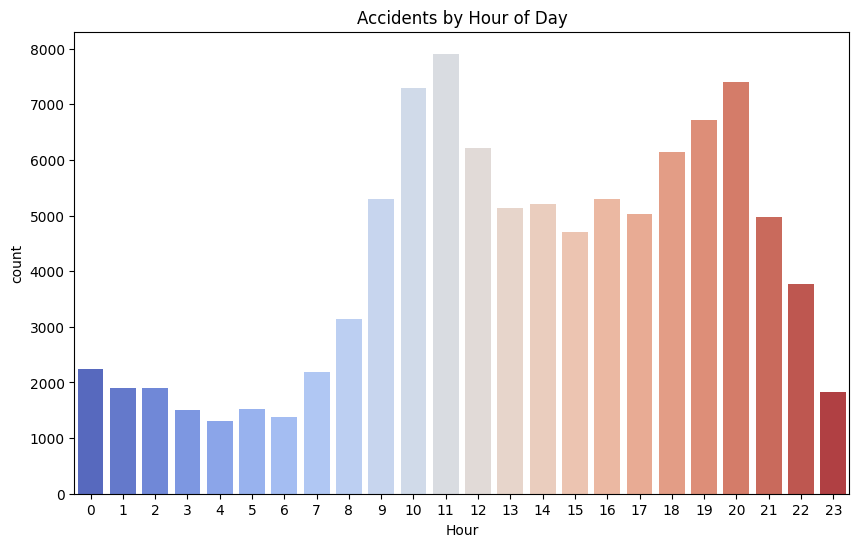

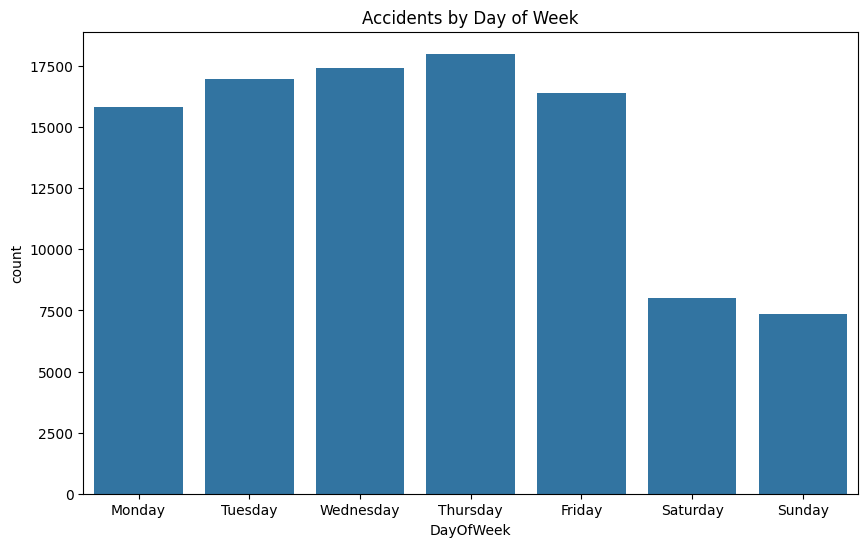

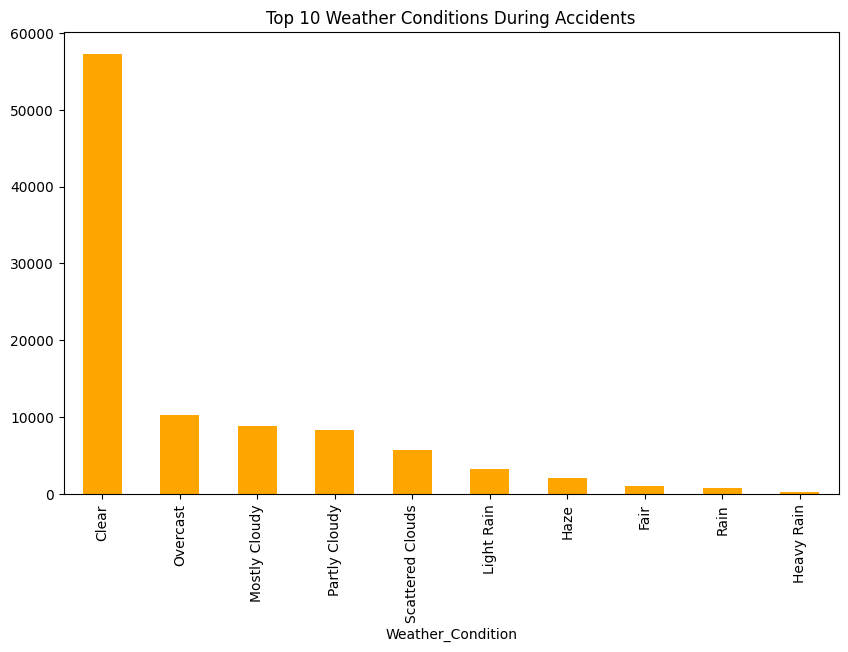

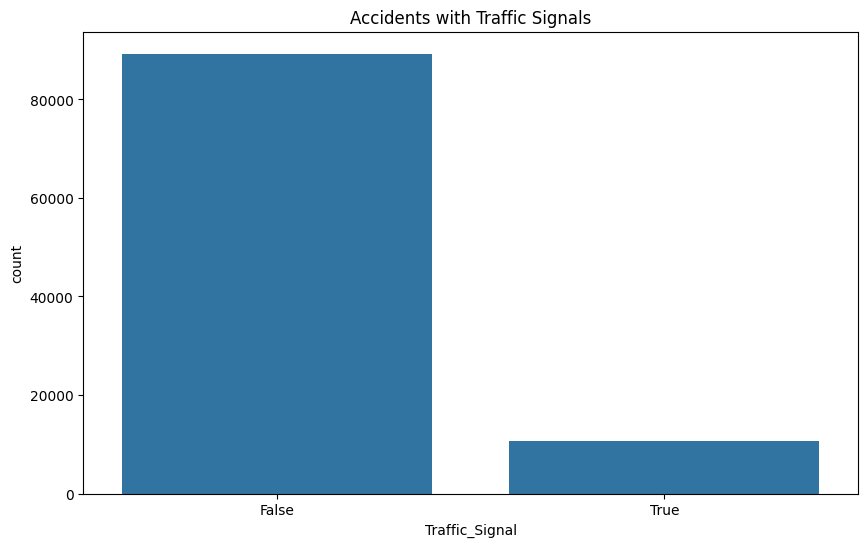

Hotspot map saved as 'accident_hotspots.html'


In [8]:






# ==========================
# 4. Analysis & Visualizations
# ==========================
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', palette='coolwarm')
plt.title("Accidents by Hour of Day")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Accidents by Day of Week")
plt.show()

plt.figure(figsize=(10, 6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Weather Conditions During Accidents")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Traffic_Signal')
plt.title("Accidents with Traffic Signals")
plt.show()

# ==========================
# 5. Hotspot Detection (KMeans)
# ==========================
coords = df[['Start_Lat', 'Start_Lng']].sample(1000)  # smaller sample for speed
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(coords)
centers = kmeans.cluster_centers_

map_hotspots = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)
for lat, lng in centers:
    folium.CircleMarker([lat, lng], radius=8, color='red', fill=True, fill_opacity=0.6).add_to(map_hotspots)

map_hotspots.save("accident_hotspots.html")
print("Hotspot map saved as 'accident_hotspots.html'")


Accuracy: 0.8794715447154472

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.91      0.87      0.89     10879
           3       0.85      0.89      0.87      8770
           4       0.00      0.00      0.00         6

    accuracy                           0.88     19680
   macro avg       0.44      0.44      0.44     19680
weighted avg       0.88      0.88      0.88     19680


Confusion Matrix:
 [[   0   17    8    0]
 [   0 9513 1366    0]
 [   0  975 7795    0]
 [   0    1    5    0]]


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

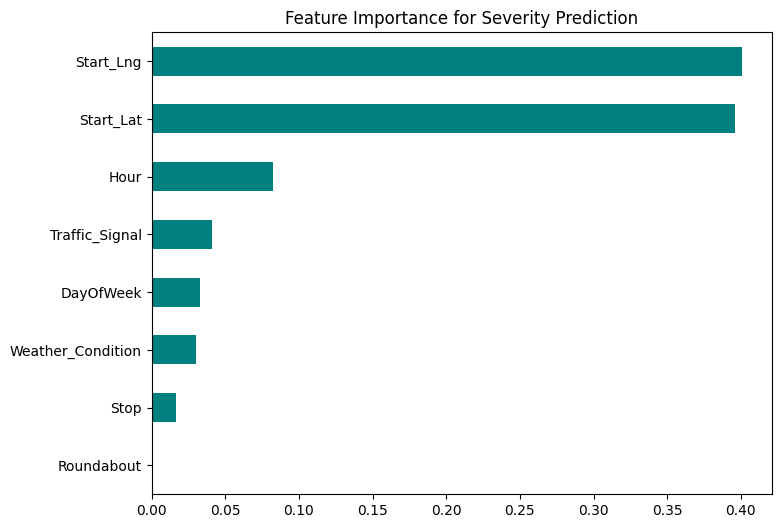

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ==========================
# 1. Load Only One Chunk
# ==========================
chunksize = 100_000
chunks = pd.read_csv(r"C:\Users\ACER\Downloads\archive (11)\US_Accidents_March23.csv", chunksize=chunksize)
df = next(chunks)  # First chunk only

# ==========================
# 2. Preprocessing
# ==========================
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Severity', 'Weather_Condition'], inplace=True)

# Feature engineering
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

# Encode categorical variables
label_encoders = {}
for col in ['Weather_Condition', 'DayOfWeek']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ==========================
# 3. Select Features & Target
# ==========================
features = ['Start_Lat', 'Start_Lng', 'Hour', 'DayOfWeek', 
            'Weather_Condition', 'Traffic_Signal', 'Stop', 'Roundabout']

# Ensure boolean features are int
for col in ['Traffic_Signal', 'Stop', 'Roundabout']:
    df[col] = df[col].astype(int)

X = df[features]
y = df['Severity']

# ==========================
# 4. Train-Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 5. Model Training
# ==========================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ==========================
# 6. Predictions & Evaluation
# ==========================
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ==========================
# 7. Feature Importance
# ==========================
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(8, 6), color='teal')
plt.title("Feature Importance for Severity Prediction")
plt.show()


In [10]:
import joblib  

In [11]:
joblib.dump(model, "accident_severity_model.pkl")
print("✅ Model saved as 'accident_severity_model.pkl'")

# Save label encoders too (for future encoding in prediction)
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Label encoders saved as 'label_encoders.pkl'")

✅ Model saved as 'accident_severity_model.pkl'
✅ Label encoders saved as 'label_encoders.pkl'
